In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

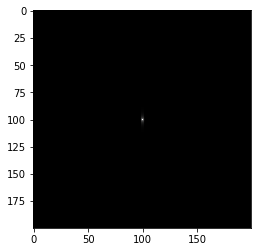

In [6]:
def create_plus_sign_image(size, max_intensity, thickness_scale=0.05):
    image = np.zeros((size, size))

    center = size // 2
    thickness = int(size * thickness_scale) 
    assert thickness > 0, "increase thickness scale"

    for i in range(size):
        for j in range(size):
            if center - thickness <= j <= center + thickness:
                distance = np.sqrt((i - center)**2 + (j - center)**2)
                intensity = max_intensity * np.exp(-(distance)**0.7)
                image[i, j] = intensity

    return image

psf = create_plus_sign_image(200,0.1,0.005)
plt.figure(1)
plt.imshow(psf,cmap='gray')
plt.savefig('psf.png')

In [10]:
kernel = np.ones((3, 3), np.uint8)

# img_erosion = cv2.erode(img, kernel, iterations=1)
# img_dilation = cv2.dilate(img, kernel, iterations=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


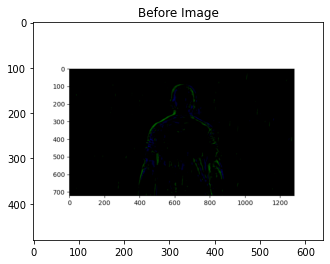

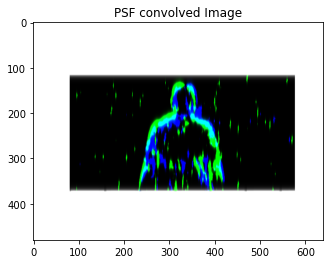

In [11]:

mat = cv2.imread('event_img/test.png')
mat_b = mat[:,:,0]
mat_g = mat[:,:,1]
mat_r = mat[:,:,2]

mat_b_c = convolve2d(mat_b, psf/np.sum(psf), mode='same')
mat_g_c = convolve2d(mat_g, psf/np.sum(psf), mode='same')
mat_r_c = convolve2d(mat_r, psf/np.sum(psf), mode='same')

mat_b_c = cv2.erode(mat_b_c, kernel, iterations=1)
mat_g_c = cv2.erode(mat_g_c, kernel, iterations=1)
mat_r_c = cv2.erode(mat_r_c, kernel, iterations=1)

mat_conv = np.zeros(mat.shape)
mat_conv[:,:,0] = mat_b_c
mat_conv[:,:,1] = mat_g_c
mat_conv[:,:,2] = mat_r_c
plt.figure(2)
plt.title('Before Image')
plt.imshow(mat, cmap='gray')
# plt.savefig('before_bgr.png')
plt.figure(3)
plt.title('PSF convolved Image')
plt.imshow(mat_conv, cmap='gray')
# plt.savefig('psf_convolved_bgr_n1.png')

# cv2.imwrite('Before_im.png', mat*255)
# cv2.imwrite('psf_convolved_bgr_n2_err_3k.png', mat_conv*255)

# mat1 = cv2.cvtColor(mat, cv2.COLOR_BGR2GRAY)
# mat1 = cv2.resize(mat1, (1000,1000))

# mat = convolve2d(mat1, psf/np.sum(psf), mode='same')


In [12]:
cv2.imwrite('psf_img/IMAGE_BEFORE.png', mat*255)
cv2.imwrite('psf_img/IMAGE_AFTER.png', mat_conv*255)

True